# Market Equilibrium under different market forms

Import various packages

In [1]:
import numpy as np
import scipy as sp
from scipy import linalg
from scipy import optimize
from scipy import interpolate
import sympy as sm
from scipy import optimize,arange
from numpy import array

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Model Description

We consider the standard economic promlem for a Monopoly firm maximizing it's profits.

The aggregate market demand is given by
$$Q(p)=A-\alpha\cdot p$$
which corresponds to the inverse market demand function
$$p(Q)=\frac{A}{\alpha}-\frac{1}{\alpha}\cdot Q$$

and the Monopoly profits are given $$\pi(q)=p\cdot q-c(q)=\left(\frac{A}{\alpha}-\frac{1}{\alpha}\cdot q\right)\cdot q-c\cdot q$$

where $q=Q$, $p(Q)$ is a linear market demand curve and $c(q)$ is the firms cost-function with constant cost $c$. 

# Market Equilibrium

## Analytical Solution

Using Sympy, we seek to find an analytical expression for the market equilibrium when one firm has monopoly power, i.e. solve the monopoly firm's maximization problem

\\[ \max_{q}\pi(q)=\max_{q} \left(\frac{A}{\alpha}-\frac{1}{\alpha}\cdot q\right)\cdot q-c\cdot q \\]

Which has the standard solution given by:
$$q^{M\ast}=\frac{A-\alpha\cdot c}{2}\wedge p^{\ast}=\frac{A+\alpha\cdot c}{2\cdot\alpha}$$

In [2]:
sm.init_printing(use_unicode=True) # sets printing on
# Defining variables;
A = sm.symbols('A')
q = sm.symbols('q')
c = sm.symbols('c')
alpha=sm.symbols('alpha')


In [3]:
Pi = (A/alpha-q/alpha)*q-c*q # Define the firms profit function
F = sm.diff(Pi,q) # Take the first order condition
F


In [4]:
Mq = sm.solve(F,q)[0] # Solves F for market quantity
# And the market price is given by;
Mp=(A-Mq)*1/alpha
sm.Matrix([Mq,Mp]) # Prints the market quantity and price


⎡A   α⋅c⎤
⎢─ - ───⎥
⎢2    2 ⎥
⎢       ⎥
⎢A   α⋅c⎥
⎢─ + ───⎥
⎢2    2 ⎥
⎢───────⎥
⎣   α   ⎦

In [5]:
#For later use, We turn the above solution into a Python function
Mq_func = sm.lambdify((A,alpha,c),Mq)
Mp_func = sm.lambdify((A,alpha,c),Mp)

## Numerical Solution

As a brief introduction to solving the problem numerically, we use a solver like fsolve to solve the first-order condition given the following parameter values:

Remember, the first-order condition is given by:
$$\frac{A}{\alpha}-c-\frac{2q}{\alpha}=0$$

In [6]:
A = 4
alpha = 2 
c = 1
output = optimize.fsolve(lambda q: 2-q-1,0)
print(f'analytical solution for market quantity is: {Mq_func(A,alpha,c):.2f}')
print(f' Solution with fsolve for market quantity is: {output}')
print(f'analytical solution for market price is: {Mp_func(A,alpha,c):.2f}')

analytical solution for market quantity is: 1.00
 Solution with fsolve for market quantity is: [1.]
analytical solution for market price is: 1.50


However for later use, It is perhaps more efficent to make Python maximize the firm's profits directly. However, as scipy only has minimization procedueres. We continue to minimize $-\pi(q)$, i.e. minimizing negative profits is the same as maximizing profits. 

Below we first define functions for market demand and costs in python

In [7]:
def demand(Q):
    return A/alpha-1/alpha*Q

def cost(q,c):  # c is constant marginal cost
    return c*q

In [8]:
def minus_profits(q,*args):         # we want to see profits as a function of q when we maximize profits or
    return -(demand(q)*q-cost(q,c)) # minimize minus_profits; hence c is specified as "*args", when calling fmin
                                    # we specify the c in the "args=(c,)"
x0 = 0 # Initial guess
c = 1.0 # Specify the value of the constant cost 'c'
A=4.0 # Specify the value of the Constant in the market demand function Q(p)
alpha=2.0 # Specify the  slope coefficient in Q(p)

output = optimize.fmin(minus_profits,x0,args=(c,)) # note the comma in "args(c,)"; it needs to be there!
price=A/alpha-1/alpha*output
print(output,price)

Optimization terminated successfully.
         Current function value: -0.500000
         Iterations: 25
         Function evaluations: 50
[1.] [1.5]


Hence, the optimal output is 1, which yields the maximum profits of $-\cdot(-0.5)=0.5$

For the specified parameter values, we have plotted the monopoly firm's profit function below.

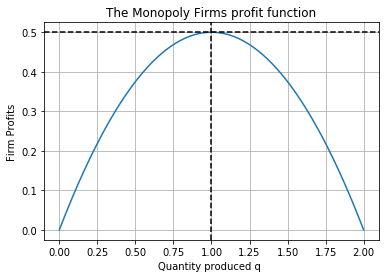

In [9]:
# Define the expression whose roots we want to find

A = 4.0 # Specify the value of the Constant in the market demand function Q(p) 
alpha = 2.0 # Specify the  slope coefficient in Q(p)
c = 1.0 # Specify the value of the constant cost 'c'

func = lambda q : (A/alpha-q/alpha)*q-c*q # Defines the profit function using a lambda function.

# Plot the profit function

q = np.linspace(0, 2, 200) # Return evenly spaced numbers over a specified interval from 0 to 2 .

plt.plot(q, func(q)) # -minus_profits(q) could have been used instead of func(q). But we wanted to show the lambda function. 
plt.axhline(y=0.5,linestyle='dashed',color='k') # creates a horizontal line in the plot at func(q)=0.5
plt.axvline(x=1,linestyle='dashed',color='k') # creates a vertical line in the plot at  q=0.5
plt.xlabel("Quantity produced q ")
plt.ylabel("Firm Profits")
plt.grid()
plt.title('The Monopoly Firms profit function')
plt.show()

And we can plot the market equilibrium price and output in a standard diagram as shown below.

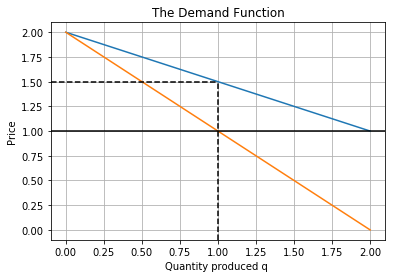

In [10]:
# Define marginal Revenue:
def MR(Q):
    return A/alpha-2/alpha*Q


plt.plot(q, demand(q)) 
plt.plot(q, MR(q))
plt.axhline(y=c,color='k') # creates a horizontal line in the plot at func(q)=0.5
plt.axvline(x=output,ymin=0,ymax=0.73,linestyle='dashed',color='k') # creates a vertical line in the plot at  q=0.5
plt.axhline(y=price,xmin=0, xmax=0.5,linestyle='dashed',color='k')
plt.xlabel("Quantity produced q ")
plt.ylabel("Price")
plt.grid()
plt.title('The Demand Function')
plt.show()

Both plottet side by side.

Text(0.5, 1.0, 'The Market Equilibrium')

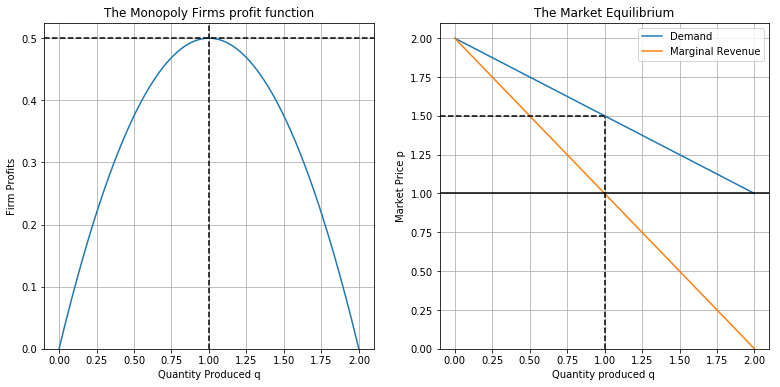

In [15]:
f = plt.figure(figsize=(13,6))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.plot(q, func(q))
ax.set_title('The Monopoly Firms profit function')
ax.set_xlabel('Quantity Produced q')
ax.set_ylabel('Firm Profits')
ax.axhline(y=0.5,linestyle='dashed',color='k') # creates a horizontal line in the plot at func(q)=0.5
ax.axvline(x=1,linestyle='dashed',color='k') # creates a vertical line in the plot at  q=0.5
ax.set_ylim(0,)  # set a lower limit for y-axis at zero.
ax.grid()

ax2.plot(q, demand(q),label='Demand')
ax2.plot(q,MR(q), label='Marginal Revenue')
ax2.legend(loc='upper right') # Place the graph descriptions in the upper right corner
ax2.grid()
ax2.axhline(y=c,color='k', label='Marginal Cost') # creates a horizontal line in the plot at func(q)=0.5
ax2.axvline(x=output,ymin=0,ymax=0.71,linestyle='dashed',color='k') # creates a vertical line in the plot at  q=0.5
ax2.axhline(y=price,xmin=0, xmax=0.5,linestyle='dashed',color='k')
ax2.set_xlabel("Quantity produced q ")
ax2.set_ylabel("Market Price p")
ax2.set_ylim(0,)
ax2.set_title('The Market Equilibrium')

We see that when the monopoly firm is producing $q=1$, they get the maximum profits of 0.5. In the right figure, we see that the monopoly firm maximises profits in the point, where the marginal revenue curve intersect the marginal cost curve(black line). The two curves intersect at $q=1$, and the market price is $p=1.5$ as given by the demand curve.


# Extentions: Solving for market equilibrium in a duopoly setting

## Market Equilibrium with Cournot Competition

Consider the inverse demand funcion with identical goods
$$p(Q)=\frac{A}{\alpha}-\frac{1}{\alpha}\cdot Q=\frac{A}{\alpha}-\frac{1}{\alpha}\cdot(q_1+q_2)$$

where $q_1$ is firm 1's output and $q_2$ is firm 2's output. $Q=q_1+q_2$. 

Both firms have identical cost-function $c(q_i)=c\cdot q_i$. So given cost and demand, each firm have the following profit function:
$$\pi_{i}(q_{i},q_{j})=p_i(q_i,q_j)q_i-c(q_i)$$,
$i,j\in\{0,1\},i\neq j$, which they seek to maximize.

As this is the standard Cournot problem with two firms competing in quantities, we know that in equilibrium both firms produces the same Cournot output level given by:
$$q_1^{C}=q_2^{C}=\frac{A-\alpha c}{3}$$

### Analytical Solution

We can use **sympy** to find an analytical expression for the market equilibrium/ the Cournot Nash Equilibrium, i.e. solving for the pair $(q_1^{C},q_2^{C})$ in which both firms play a best-response to the other firms equilibrium strategy. Hence
$$\max_{q_{i}} \pi_{i}(q_i,q_j^{\ast})=\max \left(\frac{A}{\alpha}-\frac{1}{\alpha}\cdot(q_i+q_j^{\ast})-c\right)q_i $$



In [43]:
# Defining variables;
A = sm.symbols('A') # Constant in Q(p)
q1 = sm.symbols('q1') # Firm 1's output
q2 = sm.symbols('q2') # Firm 2's output
c = sm.symbols('c') # Contant cost
alpha=sm.symbols('alpha') # Slope coefficient in Q(p)

Pi1 = (A/alpha-1/alpha*(q1+q2))*q1-c*q1 # Firm 1's profit function

Pi2 = (A/alpha-1/alpha*(q1+q2))*q2-c*q2 # Frim 2's profit function

F1 = sm.diff(Pi1,q1) # Take the first order condition for firm 1
F2 = sm.diff(Pi2,q2) # Take the first order condition for firm 2
sm.Matrix([F1,F2]) # Prints the first order conditions

⎡A       q₁   q₁ + q₂⎤
⎢─ - c - ── - ───────⎥
⎢α       α       α   ⎥
⎢                    ⎥
⎢A       q₂   q₁ + q₂⎥
⎢─ - c - ── - ───────⎥
⎣α       α       α   ⎦

In [44]:
Cq2 = sm.solve(F2,q2)[0] # Solves Firm 2's FOC for q2.
Cq2

In [45]:
Cq1 = sm.solve(F1,q2)[0] # Solves Firm 1's FOC for q2.
Cq1

In [46]:
CON=sm.solve(Cq1-Cq2,q1)[0] # In Eq Cq1=Cq2, so solve  Cq1=Cq2=0 for q1
CON

Given the standard symmetry argument, we know that both firms produce the same in equilibrium. Hence
$$q_1^{C}=q_2^{C}=\frac{A-\alpha c}{3}$$
as given above.

The total market quantity and price are found below.

In [47]:
MCQ = 2*CON  #  market quantiy
# And the market price is given by;
MCP=(A-MCQ)*1/alpha
sm.Matrix([MCQ,MCP]) # Prints the market quantity and price

⎡2⋅A   2⋅α⋅c⎤
⎢─── - ─────⎥
⎢ 3      3  ⎥
⎢           ⎥
⎢ A   2⋅α⋅c ⎥
⎢ ─ + ───── ⎥
⎢ 3     3   ⎥
⎢ ───────── ⎥
⎣     α     ⎦

These can again by turned into python-functions to compare the analytical solution with the numerical solution

In [18]:
CON_func = sm.lambdify((A,alpha,c),CON) # Cournot quantity
MCP_func = sm.lambdify((A,alpha,c),MCP) # Market price

### Numerical Solution

In [19]:
def demand(q1,q2,b): # Define demand 
    return A/alpha-1/alpha*(q1+b*q2) # b is in place to allow for potential heterogeneous goods.

def cost(q,c):
    if q == 0:
     cost = 0
    else:
     cost = c*q
    return cost

In [20]:
def profit(q1,q2,c1,b): # Define a function for profits
    return demand(q1,q2,b)*q1-cost(q1,c1)

Define reaction functions.

As we know scipy has various methods to optimize function. However as they are defined as minimization problems, maximizing a function $f(x)$ is the same as minimzing $-f(x)$.

In [21]:
def reaction(q2,c1,b):
    q1 = optimize.brute(lambda q: -profit(q,q2,c1,b), ((0,1,),)) # brute minimizes the function;
                                                                 # when we minimize -profits, we maximize profits
    return q1[0]

A solution method which can be used to solve many economic problems to find the Nash equilibrium, is to solve for the equilibirum as fixed point.

Hence we are looking for a fixed point in which the following is true.
$$\left(\begin{matrix}
           q_{1}^{\ast} \\
           q_{2}^{\ast} 
         \end{matrix}\right)=\left(\begin{matrix}
           r_{1}(q_2^{\ast}) \\
           r_{2}(q_1^{\ast}) 
         \end{matrix}\right) 
        $$
 
where $r_1(q_2)$ is firm 1's reaction-function to firm 2's production level and vice versa.

Numerically this can be solved by defining a vector function:
$$f(q)=\left(\begin{matrix}
           r_{1}(q_2^{\ast}) \\
           r_{2}(q_1^{\ast}) 
         \end{matrix}\right)$$
and solve for a point $q^{\ast}=(q_1^{\ast},q_2^{\ast})$ such that $f(q^{\ast})=q^{\ast}$ 

We then define a function defined as $x-f(x)$ and look for the solution $x^{\ast}-f(x^{\ast})=0$

In [22]:
def vector_reaction(q,param): # vector parameters = (b,c1,c2)
    return array(q)-array([reaction(q[1],param[1],param[0]),reaction(q[0],param[2],param[0])])

In [23]:
param = [1.0,1.0,1.0] # Specify the parameters (b,c1,c2)
q0 = [0.3, 0.3] # Initial guess for quantities
alpha=2
A=4
ans = optimize.fsolve(vector_reaction, q0, args = (param))
print(ans)

[0.6666581 0.6666581]


In [24]:
A = 4
alpha = 2 
c = 1
print(f'analytical solution for Cournot quanty is: {CON_func(A,alpha,c):.2f}')
print(f'analytical solution for market price is: {MCP_func(A,alpha,c):.2f}')
print(f' Solution with fsolve for market quanty is: {ans}')


analytical solution for Cournot quanty is: 0.67
analytical solution for market price is: 1.33
 Solution with fsolve for market quanty is: [0.6666581 0.6666581]


And we see that the numerical solution for the market quantity is fairly close to the analytical solution at $q_1^{C}=q_2^{C}=\frac{2}{3}$

Below we illustrate the equilibrium quantities visually by plotting the two firms reaction functions/best-response functions. The equilibrium quantities is found in the point in which they intersect.

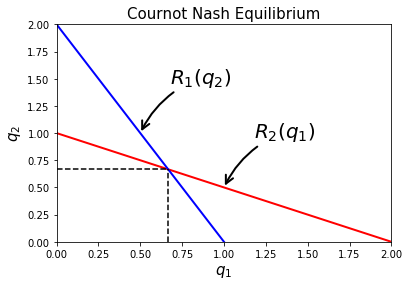

In [25]:
# Define the expression whose roots we want to find

A = 4.0 # Specify the value of the Constant in the market demand function Q(p) 
alpha = 2.0 # Specify the  slope coefficient in Q(p)
c = 1 # Specify the value of the constant cost 'c'

func1 = lambda q : 1/2*(A-alpha*c-q) # Defines the best-response function for firm 1using a lambda function.
func2 = lambda q : A-alpha*c-2*q

# Plot the profit function

q = np.linspace(0, 5, 200) # Return evenly spaced numbers over a specified interval from 0 to 2 .

plt.clf()
plt.plot(q, func1(q),'-', color = 'r', linewidth = 2)
plt.plot(q,func2(q),'-', color = 'b', linewidth = 2)
plt.title("Cournot Nash Equilibrium",fontsize = 15)
plt.xlabel("$q_1$",fontsize = 15)
plt.ylabel("$q_2$",fontsize = 15,rotation = 90)
plt.axvline(x=CON_func(A,alpha,c),ymin=0,ymax=1/3,linestyle='dashed',color='k') # creates a vertical line in the plot at  q=2/3
plt.axhline(y=CON_func(A,alpha,c),xmin=0,xmax=1/3,linestyle='dashed',color='k') # creates a horizontal line in the plot at  q=2/3

plt.annotate('$R_2(q_1)$', xy=(1,0.5),  xycoords='data', # here we define the labels and arrows in the graph
              xytext=(30, 50), textcoords='offset points', size = 20,
              arrowprops=dict(arrowstyle="->", linewidth = 2,
                              connectionstyle="arc3,rad=.2"),
              )
plt.annotate('$R_1(q_2)$', xy=(0.5,1),  xycoords='data', # here we define the labels and arrows in the graph
              xytext=(30, 50), textcoords='offset points', size = 20,
              arrowprops=dict(arrowstyle="->", linewidth = 2,
                              connectionstyle="arc3,rad=.2"),
              )
plt.xlim(0,2) # sets the x-axis
plt.ylim(0,2) # Sets the y-axis

We see that when both firms have symmetric cost $c_1=c_2=c$ and produce homogeneous goods, both firms produce the same in the Cournot Nash equilibrium. We see that both firms individually produce less than if they have monopoly power due to the small increase in competition in the market. Hence when no collusion is possible as this is a one period static problem, the total market output is larger than the monopoly outcome and the associated market price is lower. However assuming no externalities and the standard economic assumptions, the market outcome is still inefficient seen from a social planners perspective as it is not equal to the social optimum, where all firms produce in the point in which marginal costs equal the market price.

## Market Equilibrium with Betrand Competition with differentiated goods

Lastly we will investiate the market outcome in the duopoly setting with two firms is competing in prices rather than quanties. This competition type is called bertrand competion, and we will consinder the Betrand model with differentiated products and the standard Betrand Model of Duopoly with identical firms producing homogeneous products with the same cost-functions with constant marginal costs c.

The market demand function is the same given by
$$Q(p)=A-\alpha\cdot p$$

However from the perspective of firm i, the consumers demand for firm i's good is:
$$q_i(p_i,p_j)=A-p_i+b\cdot p_j$$, $i,j\in\{1,2\}, i\neq j$, where b indicates that the goods are imperfect substitutes.

The profit of firm i when choosing the price $p_i$ and firm j chooses the price $p_j$ is given by:
$$\pi_i(p_i,p_j)=q_i(p_i,p_j)[p_i-c]$$

And the price pair $(p_1^{\ast},p_2^{\ast})$ constitute a Nash equilibrium if, for each firm i, the choosen price $p_i^{\ast}$ solve the firms maximization problem, i.e.
$$\max_{0\leq p_i<\infty}\pi_i(p_i,p_j^{\ast})=\max_{0\leq p_i<\infty}\left[A-\alpha\cdot p_i+\alpha\cdot p_j^{\ast}\right][p_i-c]$$


### Analytical Solution with differentiated goods

We can use **sympy** to find an analytical expression for the market equilibrium/ the Bertrand Nash Equilibrium, i.e. solving for the pair $(p_1^{B},p_2^{B})$ for which both firms play a best-response to the other firms equilibrium strategy.

As this is the standard problem, we know already that both firms will try to underbid eachother in prices until they both reach their marginal cost. Hence in equilibrium, $p_1^{B}=p_2^{B}=c$ and it is assumed that each firm produce half of the total market demand, i.e.
$$p_1^{B}=p_2^B=\frac{A+c}{2-b}$$

Also known as the monopoly quanty

In [127]:
# Defining variables;
A = sm.symbols('A') # Constant in Q(p)
p1 = sm.symbols('p1') # Firm 1's price
p2 = sm.symbols('p2') # Firm 2's price
c = sm.symbols('c') # Contant cost
b = sm.symbols('b') # constant reflecting that the goods are differentiated
alpha=sm.symbols('alpha') # Slope coefficient in Q(p)

Pi1 = (A-p1+b*p2)*(p1-c) # Firm 1's profit function

Pi2 = (A-p2+b*p1)*(p2-c) # Firm2's profit function

F1 = sm.diff(Pi1,p1) # Take the first order condition for firm 1
F2 = sm.diff(Pi2,p2) # Take the first order condition for firm 2
sm.Matrix([F1,F2]) # Prints the first order conditions

⎡A + b⋅p₂ + c - 2⋅p₁⎤
⎢                   ⎥
⎣A + b⋅p₁ + c - 2⋅p₂⎦

We can then use the first order conditions to find the best-response functions by using sympy's solve function to solve $$F1=0$$ for $p_1$.

In [128]:
BR1 = sm.solve(F1,p1)[0] # Solves Firm 1's FOC for p1.
BR2 = sm.solve(F2,p2)[0] # Solves Firm 2's FOC for p2.
sm.Matrix([BR1,BR2]) # Prints the best-response functions 

⎡A   b⋅p₂   c⎤
⎢─ + ──── + ─⎥
⎢2    2     2⎥
⎢            ⎥
⎢A   b⋅p₁   c⎥
⎢─ + ──── + ─⎥
⎣2    2     2⎦

However to solve the function in an easier way, we solve firm 2's FOC for $p_1$. Call this BR12. We know that both firm's FOC must hold in equilibrium. Hence the equilibrium price is found by solving $BR1=BR12\Leftrightarrow BR1-BR12=0$ which can be solved sympy's solve function:

In [131]:
BR12=sm.solve(F2,p1)[0] # Solves Firm 2's FOC for p1.
BR12


Hence both firms charge the price $p_1^{B}=p_2^{B}=-\frac{A+c}{b-2}=\frac{A+c}{2-b}$

Turned into a function

In [115]:
MP_func = sm.lambdify((A,b,c),MP) # Market price

A = 4
b = 0.5 # parameter different from 1 to indicate imperfect substitutes
c = 1
print(f'analytical solution for Bertrand price is: {MP_func(A,b,c):.2f}')


analytical solution for Bertrand price is: 3.33


### Numerical Solution

In [146]:
A = 4
b=0.5
c = 1
B1 = 1/2*(A+b*p2+c)
B2 = 1/b*(2*p2-A-c)
SOL = optimize.fsolve(lambda p: 1/2*(A+b*p+c)-1/b*(2*p-A-c),0)
print(f' Solution with fsolve for Bertrand price is: {SOL:}')


 Solution with fsolve for Bertrand price is: [3.33333333]


Thus when the firms products are imperfect substitutes, the market price is still above the firms marginal cost. Hence the market outcome is pareto inefficient, which differs from the result from the standard Betrand model with homogeneous products.

## Market Equilibrium with Betrand Competition and homogeneous goods

The market equilibrium with betrand competition, homogeneous goods and identical firms has some interesting, nice properties. Most importantly, the equilibrium is pareto efficient equal to perfect market outcome. 

The market demand function is the same given by
$$Q(p)=A-\alpha\cdot p$$


Both firm compete in prices, and seek to maximize the profit function:
$$\max_{p_i}\pi_i(p_i,p_j)=
\begin{cases}
Q(p)\cdot (p_i-c)  &p_j>p_i\\
\frac{Q(p)\cdot (p_i-c)}{2}  &p_i=p_j\\
0 &p_i>p_j
\end{cases}
$$
It is a standard assumption that the market is divided evenly between the two firms if the set the same price, but there is no reason why it couldn't be different in practice.

Both firms have the symmetric Best-Response functions:
$$BR_i(p_j)=
\begin{cases}
p_i=p_m  &p_j>p_m\\
p_i=p_j-\epsilon  &p_i>p_j>c\\
p_i=c &p_j<c
\end{cases}$$
where $p_m$ is the monopoly price found in the first problem.

Then with simple economic reasoning it can be shown/proven that the only strategies/set of prices $\{p_1^{B},p_2^{B}\}$ that can constitute a Nash Equilibrium is $(p_1^{B},p_2^{B})=(c,c)$. Because in all other cases at least one firm has an incentive to deviate. We will not prove this, but below we show it numerically. 

So both firms will produce half of the total market output in equilibrium, i.e. both firms produce the monopoly output:
$$q^{B\ast}=\frac{A-\alpha\cdot c}{2}$$

### Numerical Solution

In [4]:

def total_demand(p): # total demand Q(p)
    return A-alpha*p

In [7]:

def profit(p1,p2,c1): # Define profit function depending p_1 and p_2 with af if, elif else statement"
    if p1 > p2:
        profits = 0 # firm 2 takes all the market
    elif p1 == p2:
        profits = 0.5*total_demand(p1)*(p1-c1) # The firms split the market in two
    else:
        profits = total_demand(p1)*(p1-c1) # firm 1 takes all the market
    return profits

def reaction(p2,c1):  # Reaction function
    if p2 > c1:
        reaction = c1+0.8*(p2-c1)
    else:
        reaction = c1
    return reaction

In [9]:
def vector_reaction(p,param): # vector param = (c1,c2)
    return array(p)-array([reaction(p[1],param[0]),reaction(p[0],param[1])])

param = [2.0,2.0] # c1 = c2 =2
alpha=2
A=4
p0 = [0.5, 0.5] # initial guess: p1 = p2 = 0.5

Psol = optimize.fsolve(vector_reaction, p0, args = (param))
print(Psol) # Bertrand prices

[2. 2.]


As should become clear from this little numerical demostration. The two firms price setting decision is in practical sense invariant to the shape of the demand curve - as long as it is downwards slopping. The two firms will regardless of the demand function try to underbid the other firm in terms of price as long as the market price is above the marginal cost c. Hence as long as there is positive profits to get in the market, both firm will try to get the entire market by setting a price just below the other. This proces will continue until the market price reach the firms marginal cost, which are assumed identical. Thus the betrand price solely depends on the value of the costs $c_1=c_2$, as the firms compete the market price $p^{B}$ down to $c_1=c_2$. Because only then, no firm has an incentive to deviate, i.e. the pair of prices ${(p_1^{B},p_2^{B}})={c}$ constitute a Nash equilibrium. This is also known as the bertrand paradox.

# Conclusion

We see that the assumption about the market structure have a critical impact on the market equilibrium. We have shown that under the standard assumptions, when there is only one firm in the market, which utilizes it's monopoly power, the market equilibrium output is inefficiently low and the equilibrium price is ineffciently high from a social welfare perspective. When the number of firms increases to two, we show that the market inefficiency decreases but at different degrees depending on competition type. If the firms compete in quantities (Cournot), the market output is still lower than the social optimum. However there is still some competition between the firms, which results in a lower market price and higher market output compared to the monopoly case. Lastly, we show that when the two firms compete in prices(Bertrand) the market equilibrium is pareto efficient. As both firms seek to undercut the other firm resulting in both firms asking a price equal to their marginal costs (assumed identical). Hence even though there are only two firms, the market equilibrium is efficient as it is identical to social optimum with a market price equal to the marginal costs. However when allowing for the two firms to produce different goods that are imperfect substitutes, both firms raise their prices above marginal cost. Thus they earn positive profit and the market outcome is once again inefficient.